In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Internship Work\Data\E-Commerce dataset.csv", encoding='ISO-8859-1')

In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [43]:
df = df.dropna(subset=['CustomerID'])

In [45]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [47]:
latest_date = df['InvoiceDate'].max()
customer_last_purchase = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
customer_last_purchase['DaysSinceLastPurchase'] = (latest_date - customer_last_purchase['InvoiceDate']).dt.days
customer_last_purchase['Churn'] = (customer_last_purchase['DaysSinceLastPurchase'] > 90).astype(int)
customer_last_purchase.head()

,CustomerID,InvoiceDate,DaysSinceLastPurchase,Churn
0,12346.0,2011-01-18 10:17:00,325,1
1,12347.0,2011-12-07 15:52:00,1,0
2,12348.0,2011-09-25 13:13:00,74,0
3,12349.0,2011-11-21 09:51:00,18,0
4,12350.0,2011-02-02 16:01:00,309,1


In [49]:
customer_features = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',      # Number of unique orders
    'Quantity': 'sum',            # Total quantity purchased
    'TotalAmount': 'sum',          # Total money spent
    'StockCode': 'nunique',        # Unique products purchased
    'Country': lambda x: x.mode()[0]  # Most frequent country
}).reset_index()

In [51]:
customer_features = pd.get_dummies(customer_features, columns=['Country'], drop_first=True)

In [53]:
customer_features.head()

,CustomerID,InvoiceNo,Quantity,TotalAmount,StockCode,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346.0,2,0,0.00,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,12347.0,7,2458,4310.00,103,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,12348.0,4,2341,1797.24,22,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12349.0,1,631,1757.55,73,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12350.0,1,197,334.40,17,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
final_df = pd.merge(customer_features, customer_last_purchase[['CustomerID', 'Churn']], on='CustomerID', how='inner')
final_df.head()

,CustomerID,InvoiceNo,Quantity,TotalAmount,StockCode,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,...,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Churn
0,12346.0,2,0,0.00,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1
1,12347.0,7,2458,4310.00,103,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2,12348.0,4,2341,1797.24,22,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,12349.0,1,631,1757.55,73,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,12350.0,1,197,334.40,17,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [57]:
print("Churn Distribution:")
print(final_df['Churn'].value_counts())

Churn Distribution:
Churn
0    2922
1    1450
Name: count, dtype: int64


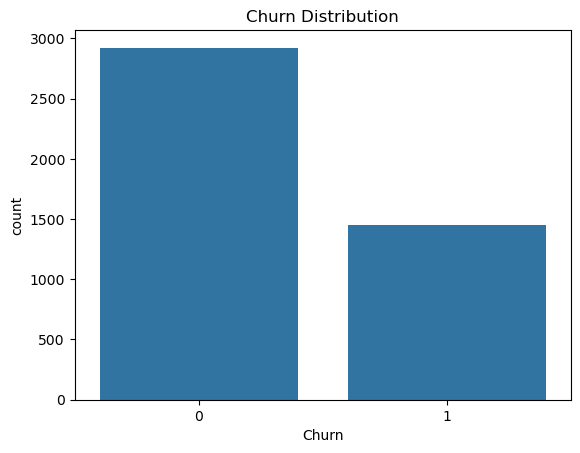

In [59]:
sns.countplot(x='Churn', data=final_df)
plt.title('Churn Distribution')
plt.show()

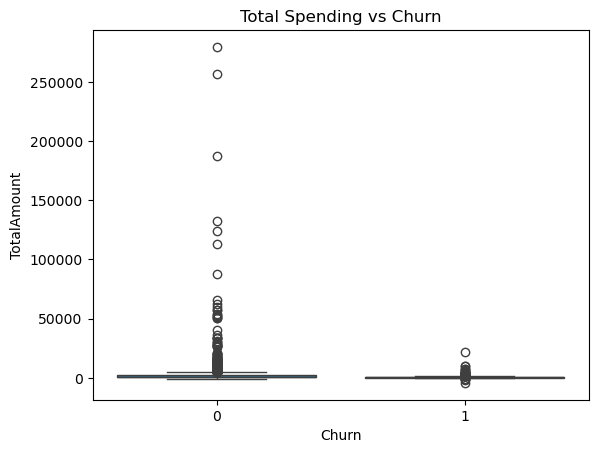

In [61]:
sns.boxplot(x='Churn', y='TotalAmount', data=final_df)
plt.title('Total Spending vs Churn')
plt.show()

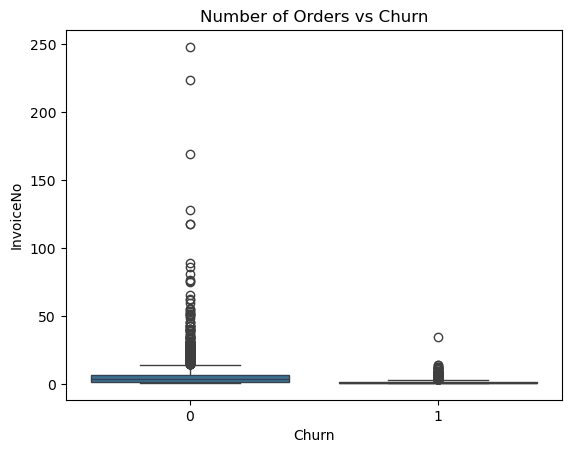

In [63]:
sns.boxplot(x='Churn', y='InvoiceNo', data=final_df)
plt.title('Number of Orders vs Churn')
plt.show()

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
X = final_df.drop(['CustomerID', 'Churn'], axis=1)
y = final_df['Churn']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
from sklearn.metrics import classification_report

In [79]:
y_pred = model.predict(X_test)

In [81]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       594
           1       0.54      0.49      0.52       281

    accuracy                           0.70       875
   macro avg       0.66      0.65      0.65       875
weighted avg       0.70      0.70      0.70       875



In [93]:
final_df.to_csv(r'C:\Users\admin\Desktop\Internship Work\Data\final_customer_churn_data.csv', index=False)